# Random Function Sampling

Three methods using numpy routines are presented,
which can be used to 
randomly sample an arbitrary 1-dim function.
The first function uses the rejection method,
the second the inversion  method and the third 
the numpy routine for sampling a histogram. 

All methods are timed to find out which is the fastest. 

In [1]:
import numpy as np
import time
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def funran0(f, Nr,xmin,xmax, Np=1000):
    """
    random sampling of function f
    using rejection sampling
    
    Parameters:
    Nr: number of random numbers
    xmin, xmax:  xmin<x<xmax
    Np: number of points generated to approximate the function
    
    Return: np.array with random numbers 
     
    """
    ar = np.array([np.nan])
    while(len(ar) < Nr):
        x  = np.linspace(xmin,xmax,Np)
        s  = f(x)
        xu = np.random.uniform(low=x.min(), high=x.max(), size=Nr)
        su = np.random.uniform(low=0, high=s.max(), size=Nr)
        xr = np.where(su <= f(xu),xu,np.nan)
        ar = np.concatenate((ar,xr))
        ar = ar[~np.isnan(ar)]
    return ar[:Nr]

In [3]:
def funran1(f, Nr,xmin,xmax, Np=1000):
    """
    random sampling of function f
    make cdf and invert function
    
    Parameters:
    Nr: number of random numbers
    xmin, xmax:  xmin<x<xmax
    Np: number of points generated to approximate the function
    
    Return: np.array with random numbers 
     
    """
    x = np.linspace(xmin,xmax,Np)
    s = f(x)
    sc= np.cumsum(s)
    scr = np.random.uniform(low=sc.min(), high=sc.max(), size=Nr)
    ir = [(sc>=r).nonzero()[0][0] for r in scr]
    xr = x[ir]
    return xr

In [4]:
def funran2(f, Nr,xmin,xmax, Np=1000):
    """
    random sampling of function f
    use scipy.stats.rv_histogram
    
    Parameters:
    Nr: number of random numbers
    xmin, xmax:  xmin<x<xmax
    Np: number of points generated to approximate the function
    
    Return: np.array with random numbers 
     
    """
    x = np.linspace(xmin,xmax,Np)
    h=np.histogram(x, bins=Np, range=None, weights=f(x), density=None)
    hr = stats.rv_histogram(h)
    xr=hr.rvs(size=Nr)
    return xr

# Test with exponential

In [5]:
def f0(x):
    return np.exp(x)

In [6]:
Nr = int(1E6)
Nbin = 100
xmin = 0
xmax = 10

time0:  0.17824196815490723


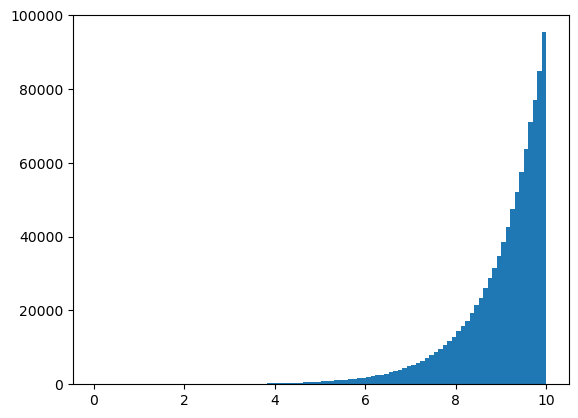

In [7]:
# usage
start = time.time()
fr=funran0(f0,Nr,xmin,xmax)
end = time.time()
print("time0: ",end-start)
p=plt.hist(fr,Nbin)

time1:  1.1814398765563965


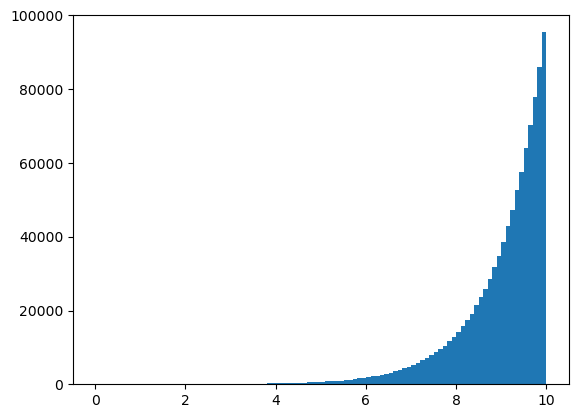

In [8]:
# usage
start = time.time()
fr=funran1(f0,Nr,xmin,xmax)
end = time.time()
print("time1: ",end-start)
p=plt.hist(fr,Nbin)

time2:  0.04707002639770508


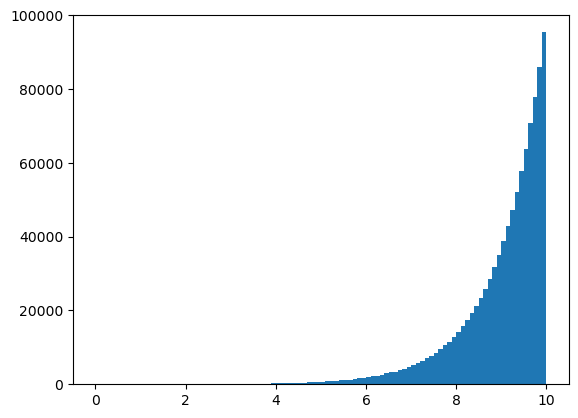

In [9]:
# usage
start = time.time()
fr=funran2(f0,Nr,xmin,xmax)
end = time.time()
print("time2: ",end-start)
p=plt.hist(fr, Nbin)

# Test with sqrt

In [10]:
def f0(x):
    return 1+np.sqrt(x)

time0:  0.03246283531188965


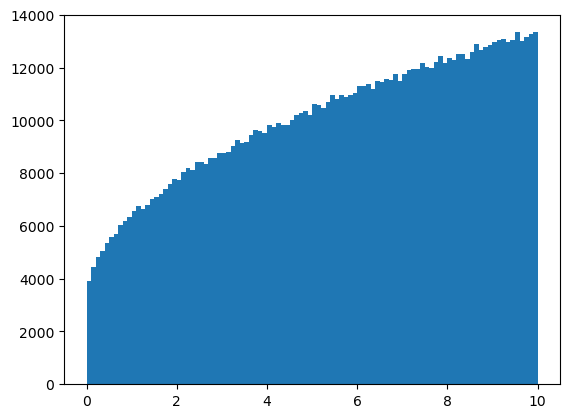

In [11]:
# usage
start = time.time()
fr=funran0(f0,Nr,xmin,xmax)
end = time.time()
print("time0: ",end-start)
p=plt.hist(fr,Nbin)

time1:  1.4450621604919434


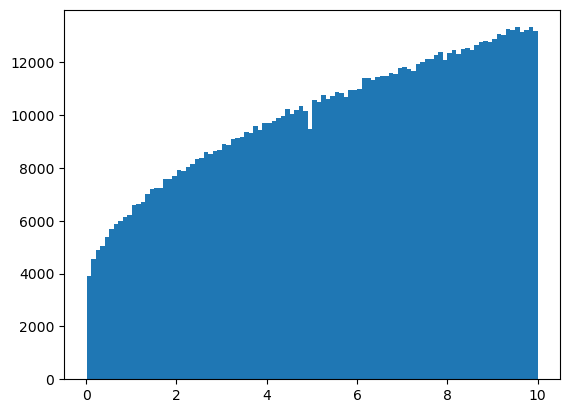

In [12]:
# usage
start = time.time()
fr=funran1(f0,Nr,xmin,xmax)
end = time.time()
print("time1: ",end-start)
p=plt.hist(fr,Nbin)

time2:  0.05188608169555664


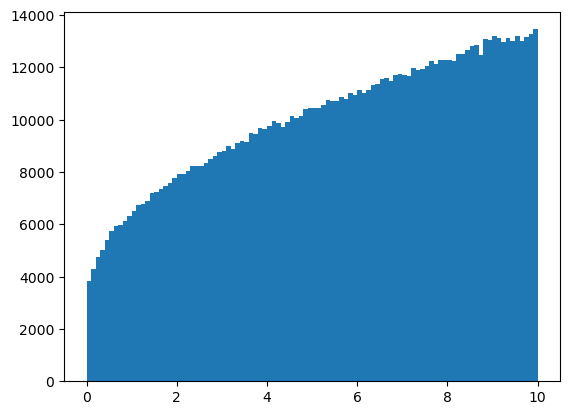

In [13]:
# usage
start = time.time()
fr=funran2(f0,Nr,xmin,xmax)
end = time.time()
print("time2: ",end-start)
p=plt.hist(fr, Nbin)